# Second Baseline model
Okay now that I have the features I wanted and they're all numerical now, I will try knn and Logistic regression to get a baseline model now

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from pre_process import num_of_vars, change_vars, make_binary
from compare_models import train_val_test, logistic_report, knn_report, rfc_report, gb_report, compare


In [2]:
non_preg2 = pd.read_pickle('second_model_df.pkl')

In [3]:
#define the features and target
features = ['Age', 'Num_children_born',
              'Num_living_children', 'age_at_first_marriage',
              'age_at_first_intercourse', 
              'freq_of_intercourse',
              'Religion_dup', 'children_in_residence',
              'Knowledge_of_ovulatory_cycle_dup', 
              'Knows_method_source_dup', 
              'currently_abstaining_dup', 
              'desire_for_more_kids_dup', 
              'Woman_worked_after_marriage_dup', 
              'Woman_currently_working_dup', 
              'heard_FP_message_in_last_month_dup', 
              'Has_transportation', 
              'media_exposure_level', 'Education_level_dup', 
              'Literacy_dup', 'Husbands_edu_level_dup', 
              'Husbands_literacy_dup',
              'Knowledge_of_methods_dup', 'Used_any_method_dup']

target = 'Current_method_dup'

X = non_preg2[features]
y = non_preg2[target].astype(int)


In [4]:
#split the data into train-test: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)


# Try a logistic regression model

In [5]:
logreg = LogisticRegression(penalty = 'none')
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))

0.8198832417582418


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print(logreg.score(X_test, y_test))

0.8028846153846154


In [7]:
y_true, y_pred = y_test, logreg.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       596
           1       0.00      0.00      0.00        92
           2       0.77      0.97      0.86       768

    accuracy                           0.80      1456
   macro avg       0.54      0.56      0.55      1456
weighted avg       0.76      0.80      0.77      1456



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hmm... that kinda doesn't seem right.. I'm gonna try knn

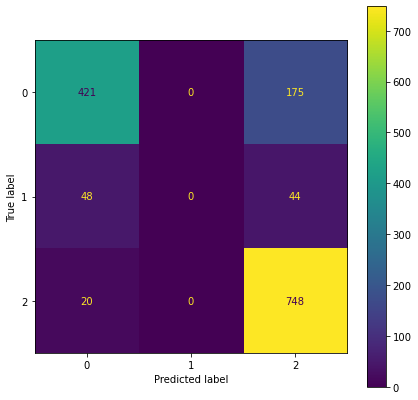

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(logreg, X_test, y_test, ax=ax);

# KNN


In [9]:
#start by scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.fit_transform(X_test.values)

In [10]:
#fit knn model

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
print('training score:', knn.score(X_train_scaled, y_train))

training score: 0.8248626373626373


In [12]:
print('test score:', knn.score(X_test_scaled, y_test))

test score: 0.7822802197802198


In [13]:
y_true_knn, y_pred_knn = y_test, knn.predict(X_test_scaled)
print(classification_report(y_true_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       596
           1       0.29      0.02      0.04        92
           2       0.74      0.93      0.83       768

    accuracy                           0.78      1456
   macro avg       0.63      0.55      0.55      1456
weighted avg       0.76      0.78      0.76      1456



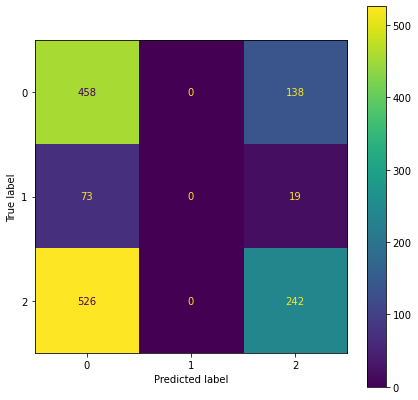

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(knn, X_test, y_test, ax=ax);

### Check for imbalance

In [16]:
non_preg2['Current_method_dup'].value_counts()

2    3937
0    2902
1     441
Name: Current_method_dup, dtype: int64

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

In [19]:
#scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_resampled.values)

In [20]:
X_test_scaled = scaler.fit_transform(X_test.values)

In [21]:
#fit knn model

knn_bal = KNeighborsClassifier(n_neighbors = 7)
knn_bal.fit(X_train_scaled, y_resampled)

KNeighborsClassifier(n_neighbors=7)

In [22]:
print('training score:', knn_bal.score(X_train_scaled, y_resampled))

training score: 0.8469548753550016


In [23]:
print('test score:', knn_bal.score(X_test_scaled, y_test))

test score: 0.6524725274725275


In [24]:
y_true_knn_bal, y_pred_knn_bal = y_test, knn_bal.predict(X_test_scaled)
print(classification_report(y_true_knn_bal, y_pred_knn_bal))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70       596
           1       0.12      0.40      0.18        92
           2       0.78      0.71      0.75       768

    accuracy                           0.65      1456
   macro avg       0.57      0.58      0.54      1456
weighted avg       0.76      0.65      0.69      1456



# Try randomforestclassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       596
           1       0.82      0.34      0.48        92
           2       0.78      0.97      0.86       768

    accuracy                           0.82      1456
   macro avg       0.84      0.67      0.71      1456
weighted avg       0.84      0.82      0.81      1456



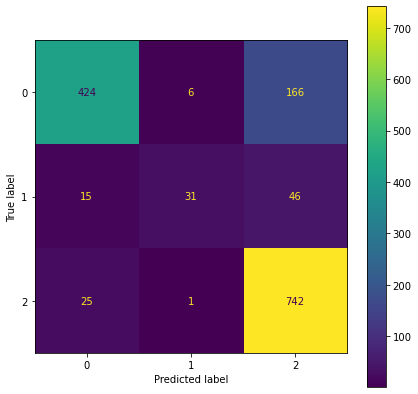

In [26]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model, X_test, y_test, ax=ax);

In [27]:
importance = model.feature_importances_

Feature: 0, Score: 0.08952
Feature: 1, Score: 0.06008
Feature: 2, Score: 0.05884
Feature: 3, Score: 0.05128
Feature: 4, Score: 0.05058
Feature: 5, Score: 0.05063
Feature: 6, Score: 0.01080
Feature: 7, Score: 0.01405
Feature: 8, Score: 0.01426
Feature: 9, Score: 0.00751
Feature: 10, Score: 0.02371
Feature: 11, Score: 0.03035
Feature: 12, Score: 0.01194
Feature: 13, Score: 0.01143
Feature: 14, Score: 0.01471
Feature: 15, Score: 0.01620
Feature: 16, Score: 0.03045
Feature: 17, Score: 0.01579
Feature: 18, Score: 0.01133
Feature: 19, Score: 0.02335
Feature: 20, Score: 0.00925
Feature: 21, Score: 0.00371
Feature: 22, Score: 0.39020


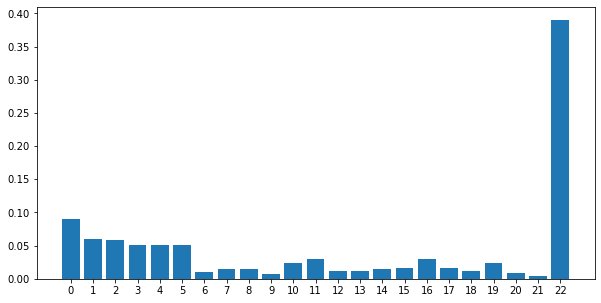

In [28]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([i for i in range(23)])
plt.show()

In [29]:
#looks like if they've ever used any method is the most impt feature
#is that data leakage?
#same with currently abstaining
X_train.head()

,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,Knows_method_source_dup,...,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup,Used_any_method_dup
2887,25,2,2,18,18.0,4.0,1,1,1,1,...,0,1,0,0,1,2,1,2,1,2
4412,37,4,4,20,20.0,4.0,1,0,1,1,...,1,0,1,3,2,2,2,2,1,2
4299,31,6,6,18,18.0,3.0,1,1,0,1,...,0,1,1,0,1,2,1,2,1,2
5829,38,2,2,24,24.0,6.0,0,0,1,1,...,1,1,1,3,3,2,3,2,1,1
5149,28,3,3,17,17.0,2.0,1,1,1,1,...,0,1,1,0,1,2,1,2,1,2


In [30]:
y_train.head()

2887    2
4412    2
4299    2
5829    0
5149    2
Name: Current_method_dup, dtype: int64

In [31]:
non_preg2.Used_any_method_dup.value_counts()

2    5059
0    1874
1     347
Name: Used_any_method_dup, dtype: int64

In [32]:
non_preg2.Current_method_dup.value_counts()

2    3937
0    2902
1     441
Name: Current_method_dup, dtype: int64

In [33]:
non_preg2.groupby('Used_any_method_dup')['Current_method_dup'].value_counts(normalize = True)

Used_any_method_dup  Current_method_dup
0                    0                     1.000000
1                    1                     0.706052
                     0                     0.293948
2                    2                     0.778217
                     0                     0.183040
                     1                     0.038743
Name: Current_method_dup, dtype: float64

# Try gradientbootingclassifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier(n_estimators=1000)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       596
           1       0.67      0.38      0.49        92
           2       0.78      0.94      0.85       768

    accuracy                           0.81      1456
   macro avg       0.78      0.68      0.71      1456
weighted avg       0.82      0.81      0.80      1456



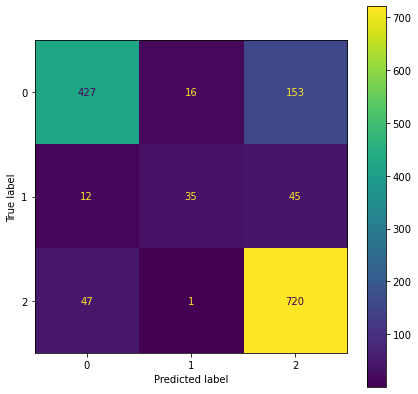

In [35]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model_GB, X_test, y_test, ax=ax);

In [36]:
importance_GB = model_GB.feature_importances_

Feature: 0, Score: 0.05281
Feature: 1, Score: 0.02141
Feature: 2, Score: 0.01433
Feature: 3, Score: 0.01207
Feature: 4, Score: 0.01412
Feature: 5, Score: 0.01749
Feature: 6, Score: 0.00300
Feature: 7, Score: 0.00558
Feature: 8, Score: 0.00271
Feature: 9, Score: 0.00070
Feature: 10, Score: 0.02993
Feature: 11, Score: 0.02867
Feature: 12, Score: 0.00262
Feature: 13, Score: 0.00263
Feature: 14, Score: 0.00334
Feature: 15, Score: 0.00287
Feature: 16, Score: 0.00860
Feature: 17, Score: 0.00506
Feature: 18, Score: 0.00265
Feature: 19, Score: 0.00742
Feature: 20, Score: 0.00219
Feature: 21, Score: 0.00067
Feature: 22, Score: 0.75910


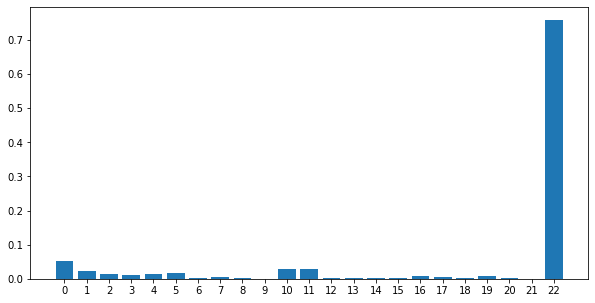

In [37]:
for i,v in enumerate(importance_GB):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (10,5))
plt.bar([x for x in range(len(importance_GB))], importance_GB)
plt.xticks([i for i in range(23)])
plt.show()

## Try without the "used any method column" it seems like data leakage

In [38]:
non_preg3 = non_preg2.iloc[:, :-2]
non_preg3.head(3)

,caseid,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,...,Woman_worked_after_marriage_dup,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup
0,11 1 1 2,41,6,5,15,15.0,4.0,1,0,1,...,1,1,1,1,1,2,2,1,2,1
1,11 1 4 4,27,5,5,18,18.0,4.0,1,1,1,...,0,0,1,1,3,2,2,2,2,1
2,11 1 8 2,41,9,9,18,18.0,3.0,1,1,1,...,1,1,1,1,1,1,2,2,2,1


In [39]:
non_preg3['Current_method'] = non_preg2['Current_method_dup']
non_preg3.head(3)

,caseid,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,...,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup,Current_method
0,11 1 1 2,41,6,5,15,15.0,4.0,1,0,1,...,1,1,1,1,2,2,1,2,1,0
1,11 1 4 4,27,5,5,18,18.0,4.0,1,1,1,...,0,1,1,3,2,2,2,2,1,0
2,11 1 8 2,41,9,9,18,18.0,3.0,1,1,1,...,1,1,1,1,1,2,2,2,1,0


In [40]:
#define the features and target
features3 = ['Age', 'Num_children_born',
              'Num_living_children', 'age_at_first_marriage',
              'age_at_first_intercourse', 
              'freq_of_intercourse',
              'Religion_dup', 'children_in_residence',
              'Knowledge_of_ovulatory_cycle_dup', 
              'Knows_method_source_dup', 
              'currently_abstaining_dup', 
              'desire_for_more_kids_dup', 
              'Woman_worked_after_marriage_dup', 
              'Woman_currently_working_dup', 
              'heard_FP_message_in_last_month_dup', 
              'Has_transportation', 
              'media_exposure_level', 'Education_level_dup', 
              'Literacy_dup', 'Husbands_edu_level_dup', 
              'Husbands_literacy_dup',
              'Knowledge_of_methods_dup']

target3 = 'Current_method'

X3 = non_preg3[features3]
y3 = non_preg3[target3].astype(int)


In [41]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X3, y3, test_size = .20, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .20, random_state = 42)
    

In [42]:
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((5824, 22), (1456, 22), (5824,), (1456,))

In [43]:
GB_non_preg3 = GradientBoostingClassifier(n_estimators=1000)
GB_non_preg3.fit(X_train, y_train)
y_pred_GB = GB_non_preg3.predict(X_val)
print(classification_report(y_val, y_pred_GB))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63       460
           1       0.12      0.03      0.05        67
           2       0.69      0.81      0.75       638

    accuracy                           0.68      1165
   macro avg       0.50      0.48      0.48      1165
weighted avg       0.66      0.68      0.66      1165



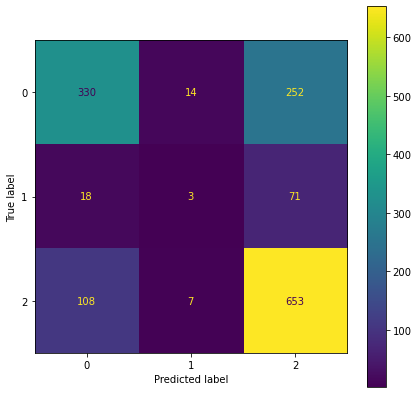

In [44]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(GB_non_preg3, X_test, y_test, ax=ax);

In [47]:
importance_non_preg3_GB = GB_non_preg3.feature_importances_

Feature: 0, Score: 0.18524
Feature: 1, Score: 0.06257
Feature: 2, Score: 0.17492
Feature: 3, Score: 0.05324
Feature: 4, Score: 0.05753
Feature: 5, Score: 0.05746
Feature: 6, Score: 0.01757
Feature: 7, Score: 0.01277
Feature: 8, Score: 0.01674
Feature: 9, Score: 0.03944
Feature: 10, Score: 0.07440
Feature: 11, Score: 0.08611
Feature: 12, Score: 0.00918
Feature: 13, Score: 0.01624
Feature: 14, Score: 0.01985
Feature: 15, Score: 0.01086
Feature: 16, Score: 0.03259
Feature: 17, Score: 0.02584
Feature: 18, Score: 0.01137
Feature: 19, Score: 0.02484
Feature: 20, Score: 0.00866
Feature: 21, Score: 0.00260


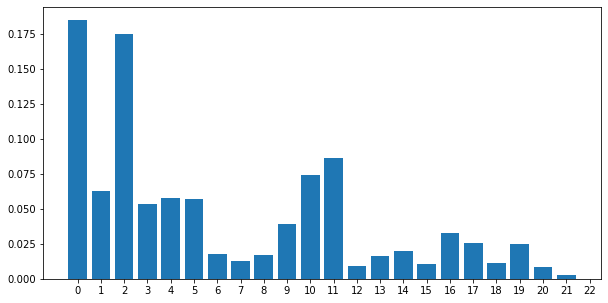

In [48]:
for i,v in enumerate(importance_non_preg3_GB):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (10,5))
plt.bar([x for x in range(len(importance_non_preg3_GB))], importance_non_preg3_GB)
plt.xticks([i for i in range(23)])
plt.show()

In [49]:
non_preg3.head(2)

,caseid,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,...,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup,Current_method
0,11 1 1 2,41,6,5,15,15.0,4.0,1,0,1,...,1,1,1,1,2,2,1,2,1,0
1,11 1 4 4,27,5,5,18,18.0,4.0,1,1,1,...,0,1,1,3,2,2,2,2,1,0


In [52]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test(non_preg3, features3, target3)

In [53]:
X_val.shape, y_val.shape

((1165, 22), (1165,))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Train score: 0.6836230950847821
Logistic Regression Validate score: 0.6592274678111588
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.71      0.45      0.55       460
           1       0.00      0.00      0.00        67
           2       0.64      0.88      0.74       638

    accuracy                           0.66      1165
   macro avg       0.45      0.44      0.43      1165
weighted avg       0.63      0.66      0.62      1165

Logistic Regression Confusion Matrix
None
knn Training Score: 0.716677398583387
knn Test Score: 0.6291845493562231
knn Classification Report
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       460
           1       0.00      0.00      0.00        67
           2       0.65      0.79      0.71       638

    accuracy                           0.63      1165
   macro avg       0.42      0.43      0.42      1165
wei

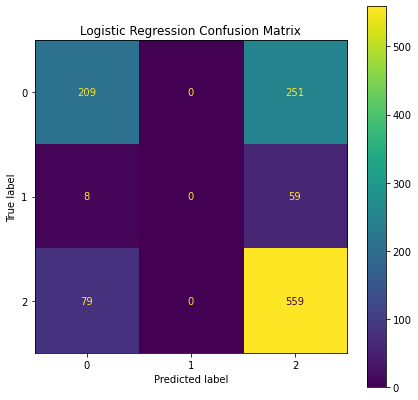

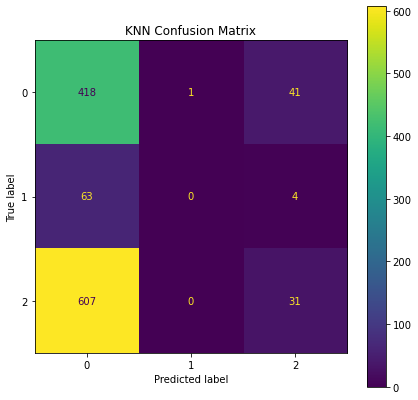

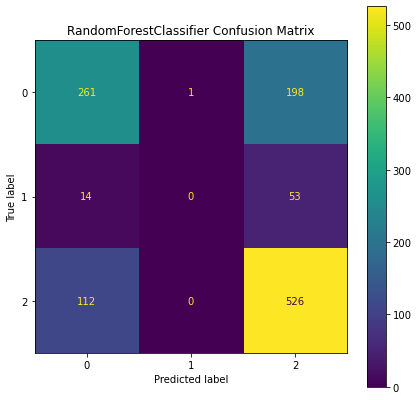

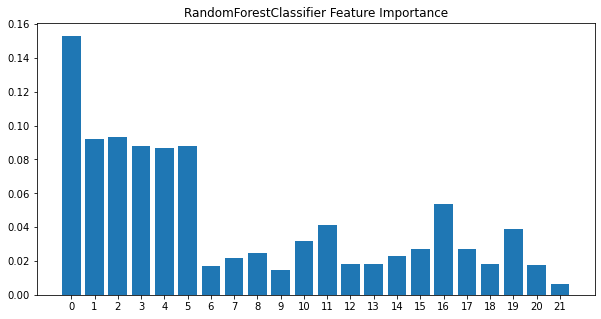

None
GradientBoodtingClassifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       460
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00       638

    accuracy                           1.00      1165
   macro avg       1.00      1.00      1.00      1165
weighted avg       1.00      1.00      1.00      1165

GradientBoodtingClassifier Confusion Matrix
GradientBoodtingClassifier feature importance
Feature: 0, Score: 0.18517
Feature: 1, Score: 0.06238
Feature: 2, Score: 0.17476
Feature: 3, Score: 0.05212
Feature: 4, Score: 0.05844
Feature: 5, Score: 0.05785
Feature: 6, Score: 0.01758
Feature: 7, Score: 0.01285
Feature: 8, Score: 0.01681
Feature: 9, Score: 0.03936
Feature: 10, Score: 0.07436
Feature: 11, Score: 0.08608
Feature: 12, Score: 0.00886
Feature: 13, Score: 0.01646
Feature: 14, Score: 0.01987
Feature: 15, Score: 0.01098
Feature: 16, Score: 0.03246
Feature: 

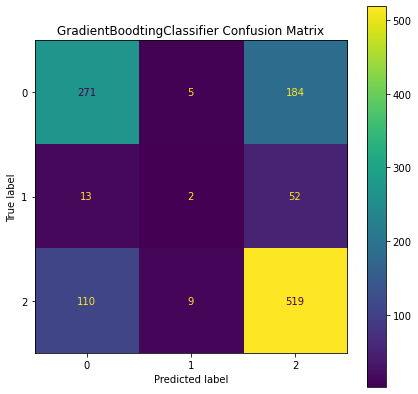

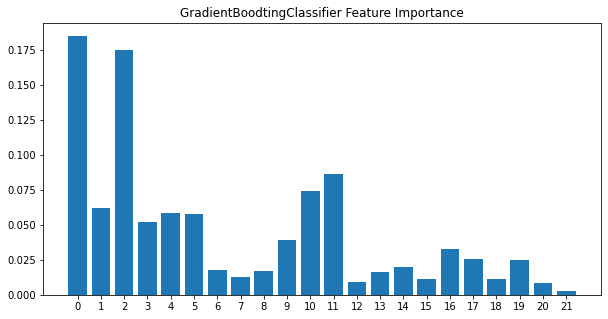

None


In [57]:
compare(X_train, y_train, X_val, y_val)